In [1]:
# import the necessery libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#DATA_PREPROCESSING

In [3]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# To get last five observations
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
#To get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


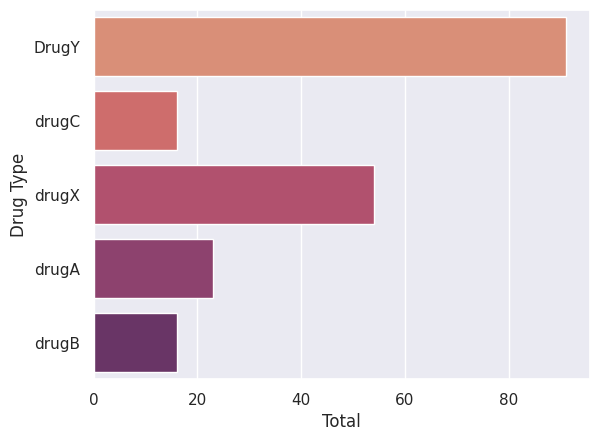

In [6]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [ ]:
#outlier detection

<Axes: >

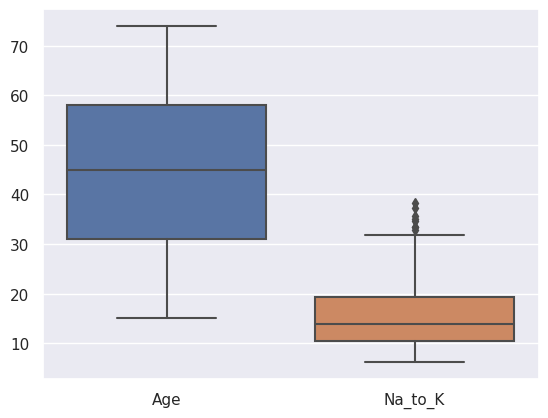

In [7]:
sns.boxplot(df)

<Axes: >

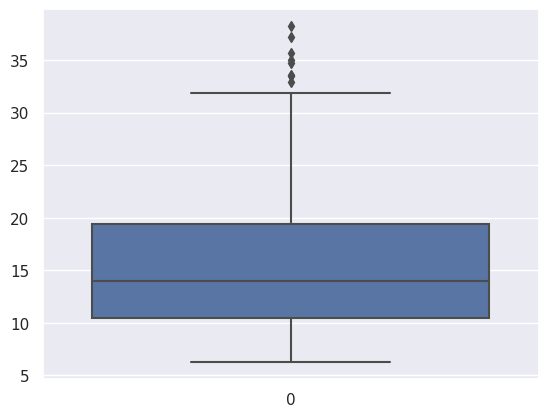

In [8]:
sns.boxplot(df.Na_to_K)

In [9]:
#To remove the outlier in the numeric field
#we use inter quatile range 
q1=df.Na_to_K.quantile(0.25)
q3=df.Na_to_K.quantile(0.75)

In [10]:
IQR=q3-q1
IQR

8.9345

In [11]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [12]:
df=df[df.Na_to_K<=upper_limit]

<Axes: >

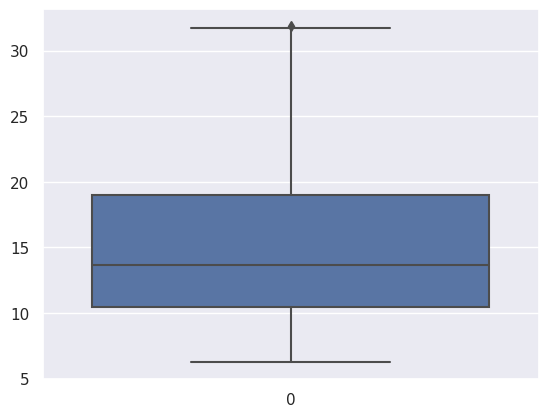

In [14]:
#checking again
sns.boxplot(df.Na_to_K)

In [15]:
# shape of the df
df.shape

(192, 6)

In [16]:
#SPLITTING THE DATA
# dependent variable x (input variable)
x=df.iloc[:,0:5]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [17]:
# independent variable y (output variable)
y=df['Drug']
y[0:2]

0    DrugY
1    drugC
Name: Drug, dtype: object

In [18]:
#Before splitting the training and the testing data we have to do encoding

#import necessary lib
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 12)

In [19]:
#ENCODING FOR CATEGORICAL COLUMNS
xtrain = pd.get_dummies(xtrain)
xtest = pd.get_dummies(xtest)

In [20]:
xtrain.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
156,31,11.227,0,1,1,0,0,0,1
17,43,13.972,0,1,1,0,0,1,0
16,69,11.455,0,1,0,1,0,0,1
51,67,10.898,0,1,0,0,1,0,1
86,51,13.597,1,0,0,0,1,1,0


In [21]:
xtest.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
63,45,8.370,0,1,0,1,0,0,1
11,34,19.199,1,0,1,0,0,0,1
178,39,15.969,0,1,0,0,1,1,0
87,69,15.478,0,1,0,1,0,1,0
150,49,8.700,0,1,1,0,0,0,1


In [22]:
ytrain = pd.get_dummies(ytrain)
ytest = pd.get_dummies(ytest)

In [23]:
#check the shape of the xtrain xtest
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((134, 9), (58, 9), (134, 5), (58, 5))

In [24]:
#BUILD MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
# Create the model
sathwika_model = Sequential()

# Add the input layer and first hidden layer
sathwika_model.add(Dense(48, input_shape=(xtrain.shape[1],), activation='relu'))

# Add additional hidden layers
sathwika_model.add(Dense(36, activation='relu'))
sathwika_model.add(Dense(24, activation='relu'))
sathwika_model.add(Dense(12, activation='relu'))


# Add the output layer
sathwika_model.add(Dense(ytrain.shape[1], activation='softmax'))

In [26]:
# Compile the model
sathwika_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:

# Train the model ----> while training itself we validate here our dataset 
sathwika_model.fit(xtrain, ytrain, epochs=15, batch_size=5, validation_data=(xtest, ytest))

Epoch 1/15
27/27 [==============================] - 2s 16ms/step - loss: 1.8452 - accuracy: 0.3955 - val_loss: 1.2597 - val_accuracy: 0.5172
Epoch 2/15
27/27 [==============================] - 0s 7ms/step - loss: 1.1655 - accuracy: 0.5746 - val_loss: 1.1424 - val_accuracy: 0.5172
Epoch 3/15
27/27 [==============================] - 0s 5ms/step - loss: 1.1154 - accuracy: 0.5224 - val_loss: 1.1533 - val_accuracy: 0.5172
Epoch 4/15
27/27 [==============================] - 0s 4ms/step - loss: 1.0718 - accuracy: 0.5597 - val_loss: 1.1142 - val_accuracy: 0.5172
Epoch 5/15
27/27 [==============================] - 0s 4ms/step - loss: 1.0454 - accuracy: 0.5821 - val_loss: 1.1075 - val_accuracy: 0.5345
Epoch 6/15
27/27 [==============================] - 0s 4ms/step - loss: 1.0146 - accuracy: 0.5970 - val_loss: 1.1571 - val_accuracy: 0.4655
Epoch 7/15
27/27 [==============================] - 0s 4ms/step - loss: 0.9933 - accuracy: 0.6194 - val_loss: 1.0861 - val_accuracy: 0.5172
Epoch 8/15
27/27 [=

In [29]:
#evaluation
test_loss, test_acc=sathwika_model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 10ms/step - loss: 1.0698 - accuracy: 0.5000
Test accuracy: 50.0


In [31]:
#testing model
ypred = sathwika_model.predict(xtest)

2/2 [==============================] - 0s 7ms/step


In [32]:
from operator import index
## Comparing predicted with the actual value
ypred_classes = np.argmax(ypred, axis=1)  

comp = pd.DataFrame({'Actual Value': np.argmax(ytest.values, axis=1),
                     'Predicted Values': ypred_classes})
print(comp)


    Actual Value  Predicted Values
0              4                 4
1              0                 0
2              0                 0
3              0                 4
4              1                 4
5              4                 4
6              0                 0
7              4                 0
8              0                 4
9              0                 4
10             0                 0
11             1                 0
12             1                 0
13             3                 4
14             4                 0
15             4                 0
16             4                 4
17             0                 4
18             2                 4
19             0                 0
20             4                 4
21             4                 4
22             1                 4
23             0                 0
24             0                 0
25             0                 0
26             1                 0
27             4    

In [34]:
#Predict the output with random value 

sathwika_model.predict([[45, 8.370,	0,	1,	0,	1,	0,	0,	1]])

1/1 [==============================] - 0s 101ms/step


array([[0.08047179, 0.04893776, 0.21810989, 0.13525303, 0.51722753]],
      dtype=float32)